# Salt Pond KO correlations with Env
###### modified from Salinity Gradient: SF_ Sal MG working with Heat, Scatter, subsets: Env, Ontol 
###### New Ontology INTEGRATION version

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
# import fastcluster
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import ticker


## Gather input data

### Environment data

In [239]:
# Import and clean environment data
# IMPROVED LOG DATA
Sal_meta = pd.read_csv('Salt_Pond_metaLOG_FIX.txt', sep='\t', index_col=0)

Sal_meta.loc[:,['CH4_umol_m2_d','CH4_m2_lin']]
# Sal_meta.head(10)

,CH4_umol_m2_d,CH4_m2_lin
0,NaN,-24.30
1,NaN,-24.30
2,NaN,-1.76
3,NaN,-1.76
4,NaN,-7.10
5,NaN,-7.10
6,0.646404,4.43
7,0.646404,4.43
8,1.617525,41.45
9,1.617525,41.45


In [240]:
# OLD LINEAR DATA 
# Sal_meta = pd.read_csv('SF_sal_meta_FIX.txt', sep='\t', index_col=1)
# Sal_meta['logCH4'] = np.log10(Sal_meta['CH4_ug_m2_h'])  
# Sal_metaS = Sal_meta.sort_values(by='Site_indx') #, inplace=True)
# Sal_meta.columns # Sal_meta.head(10)

### @@@@@@@@@@@@@@@@@@@@@@@
## Subset environment

### Make Environment Subsets

In [241]:
### DEPTH
Depth1_ONLY = Sal_meta[Sal_meta['Depth'].str.contains('D1')]
Depth2_ONLY = Sal_meta[Sal_meta['Depth'].str.contains('D2')]


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Environment SUBSET Selector

In [242]:
#   [[[ ON / OFF ]]]            # by commenting out -- NOTE Sequence will matter if [[[ ON ]]]

# Sal_meta = Depth1_ONLY        # Depth 1
# Sal_meta = Depth1_ONLY        # Depth 2


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### @@@@@@@@@@@@@@@@@@@@@@@
### Env. Chem variable selector

In [243]:
## CUT Down Env. Data
env_chem_List = ['Salinity','Cond_uS_cm', 'Temp', 'DO_perc', 'DO_mg_L', 'Redox', 'pH_YSI',
    'CH4_umol_m2_d', 'CO2_umol_m2_d', 'CH4_CO2', 'CH4_pos', 'CH4_CO2_pos',
    'pH', 'Cl', 'SO4_S', 'TOC', 'OM_LOI', 'C_Org_LOI', 'CaCO3', 'C', 'N','P', 
    'CN', 'CP', 'NP', 'NO3', 'NH4', 'Olsen_P', 'NP_ext', 'NO3_NH4', 
    'K_ppm', 'K_meq', 'Na_ppm', 'Na_meq', 'Ca', 'Mg', 'Zn', 'Mn', 'Cu',
    'Fe', 'CH4_m2_lin', 'CO2_m2_lin', 'Salinity_lin', 'pH_lin'] 
    
        # with log DATA, delete 'logCH4' now is logged, except for LIN vars
        # Drop cations, corr w. Sal: 'Ca_pw', 'Sr_pw','Mg_pw', 'Na_pw', 'K_pw', 'Al_pw', 'Si_pw', 'Br_pw', 'F_pw', 'logCH4']
        # Drop soil metals for now, half NA: 'Fe', 'Mn', 'Cu', 'Zn']
        # Drop redundant cols for PW: 'Salinity.x.1', 'CO2_mg_m2_h.1','CH4_ug_m2_h.1'

# ABSTRACT Env_chem
Env_chem = Sal_meta[env_chem_List]  # Get columns
Env_chem.head()

# Env_chem.fillna(0, inplace = True)  # Fill NAs w 0, for porewater ND - careful with soil metals

## ReINDEX Env. chem, MUST BE by Sample
Sample= Sal_meta['Sample'] 
Env_chem = Env_chem.set_index(Sample,0) 
del Env_chem.index.name        

#Sal_meta[["Sample_name","CH4_m2_lin"]]
# Env_chem.head()
# Env_chem.head(24)
Sal_meta

,New_index,Sample_name,Sample,Site,Core,Depth,Restoration,Hydrol,Date,Lat,...,Mn,Cu,Fe,CH4_m2_lin,CO2_m2_lin,Salinity_lin,pH_lin,NP_ext_lin,NP_lin,Cl_lin
0,1,Historic_R2A_A_D1,R2A_A_D1,R2A,A,D1,Historic,Tidal marsh,7/11/14,37.496219,...,2.019532,0.342423,2.471878,-24.30,300262.17,36.0,6.37,322.112865,8.484259,541
1,2,Historic_R2A_A_D2,R2A_A_D2,R2A,A,D2,Historic,Tidal marsh,7/11/14,37.496219,...,1.322219,0.518514,2.565376,-24.30,300262.17,36.0,6.19,127.168786,9.174638,518
2,3,Historic_R2A_B_D1,R2A_B_D1,R2A,B,D1,Historic,Tidal marsh,7/11/14,37.496044,...,2.065206,0.361728,2.430559,-1.76,187121.85,46.5,6.41,227.949095,10.548608,563
3,4,Historic_R2A_B_D2,R2A_B_D2,R2A,B,D2,Historic,Tidal marsh,7/11/14,37.496044,...,1.663701,0.278754,2.604226,-1.76,187121.85,46.5,6.18,309.915042,16.091627,509
4,5,Historic_R2A_C_D1,R2A_C_D1,R2A,C,D1,Historic,Tidal marsh,7/11/14,37.496546,...,2.599337,0.477121,1.997386,-7.10,266086.03,39.3,6.17,332.871712,11.275017,536
5,6,Historic_R2A_C_D2,R2A_C_D2,R2A,C,D2,Historic,Tidal marsh,7/11/14,37.496546,...,1.505150,0.579784,2.646502,-7.10,266086.03,39.3,5.86,124.276709,10.513483,527
6,7,restored_SF2_A_D1,SF2_A_D1,SF2,A,D1,Restored,Managed pond,7/17/14,37.497143,...,1.635484,0.690196,2.503518,4.43,83774.43,29.1,7.32,875.341155,7.008769,604
7,8,restored_SF2_A_D2,SF2_A_D2,SF2,A,D2,Restored,Managed pond,7/17/14,37.497143,...,1.380211,0.146128,2.596707,4.43,83774.43,29.1,6.95,947.754718,5.696967,604
8,9,restored_SF2_B_D1,SF2_B_D1,SF2,B,D1,Restored,Managed pond,7/17/14,37.497202,...,1.418301,0.778151,2.479575,41.45,145215.88,33.3,7.24,1606.204207,11.005188,803
9,10,restored_SF2_B_D2,SF2_B_D2,SF2,B,D2,Restored,Managed pond,7/17/14,37.497202,...,1.155336,0.740363,2.275311,41.45,145215.88,33.3,7.21,2394.216685,8.992713,920


# Plot env data for electron acceptor testing

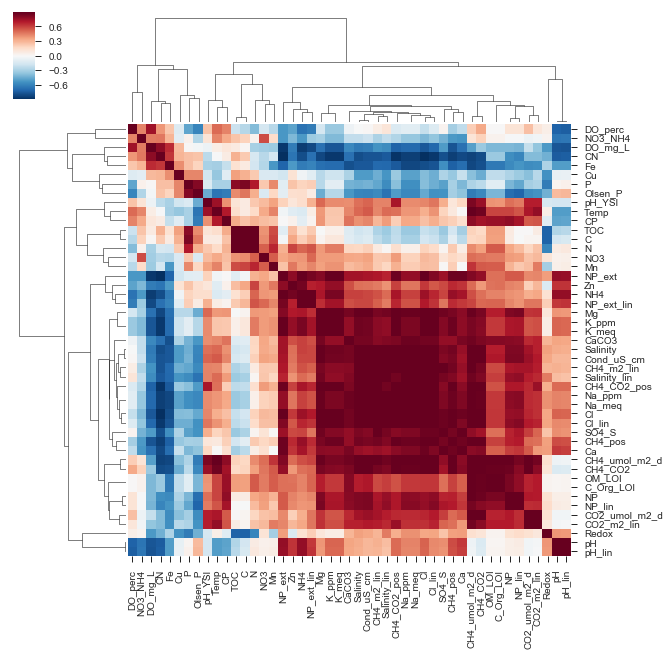

In [244]:
Sal_env_rm = Sal_meta.iloc[:,11:]
Sal_env_coronly = Sal_env_rm.corr()
cm=sns.clustermap(Sal_env_coronly, vmax=0.8, row_cluster=True, col_cluster=True, 
             square=False, figsize = (10,10));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show() 

In [245]:
Sal_meta.columns


Index([u'New_index', u'Sample_name', u'Sample', u'Site', u'Core', u'Depth',
       u'Restoration', u'Hydrol', u'Date', u'Lat', u'Long', u'Salinity',
       u'Cond_uS_cm', u'Temp', u'DO_perc', u'DO_mg_L', u'Redox', u'pH_YSI',
       u'CH4_umol_m2_d', u'CO2_umol_m2_d', u'CH4_CO2', u'CH4_pos',
       u'CH4_CO2_pos', u'pH', u'Cl', u'SO4_S', u'TOC', u'OM_LOI', u'C_Org_LOI',
       u'CaCO3', u'C', u'N', u'P', u'CN', u'CP', u'NP', u'NO3', u'NH4',
       u'Olsen_P', u'NP_ext', u'NO3_NH4', u'K_ppm', u'K_meq', u'Na_ppm',
       u'Na_meq', u'Ca', u'Mg', u'Zn', u'Mn', u'Cu', u'Fe', u'CH4_m2_lin',
       u'CO2_m2_lin', u'Salinity_lin', u'pH_lin', u'NP_ext_lin', u'NP_lin',
       u'Cl_lin'],
      dtype='object')

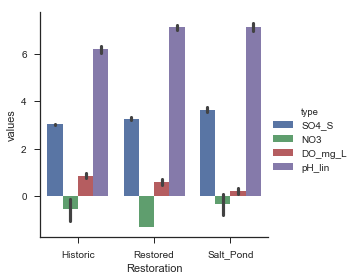

In [246]:
#sns.boxplot(x="Restoration", y="CH4_m2_lin", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="Salinity", data=Sal_meta, palette="PRGn")

#sns.boxplot(x="Restoration", y="SO4_S", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="NO3", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="DO_mg_L", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="pH_lin", data=Sal_meta, palette="PRGn")
a_list =["SO4_S","NO3","DO_mg_L","pH_lin"]
def concat_columns(a_list):
    frames = [ Sal_meta[["Restoration",each]] for each in a_list ]
    for a in frames:
        a["type"] = a.columns[1]
        a.columns = ["Restoration","values","type"] 

    return pd.concat(frames)
df_CH4sal = concat_columns(a_list)
df_CH4sal
sns.factorplot(x="Restoration", y="values", hue="type",data=df_CH4sal, kind="bar")

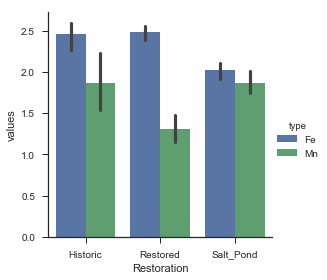

In [247]:
sns.factorplot(x="Restoration", y="values", hue="type",data=concat_columns(["Fe","Mn"]), kind="bar")


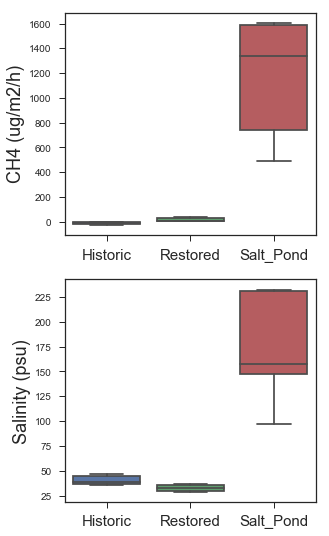

In [248]:
dft = Sal_meta[["Restoration","CH4_m2_lin","Salinity_lin"]]
#sns.pairplot(x_vars=["Restoration"],y_vars=["CH4_m2_lin","Salinity_lin"],data=Sal_meta)
#g = sns.factorplot(x="values", y="Restoration", col="type", data=dft,kind="box",col_wrap=2)
fig, axes = plt.subplots(2,1,figsize=(4.5,9))
ax1 = sns.boxplot(x="Restoration", y="CH4_m2_lin",data=dft,ax=axes[0])
ax1.set_xlabel("")
ax1.set_ylabel("CH4 (ug/m2/h)",fontsize=18)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax2 = sns.boxplot(x="Restoration", y="Salinity_lin",data=dft,ax=axes[1])
ax2.set_xlabel("")
ax2.set_ylabel("Salinity (psu)",fontsize=18)
ax2.tick_params(axis='x', which='major', labelsize=15)

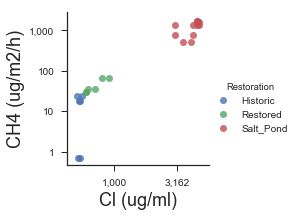

In [249]:
sns.lmplot(x='Cl',y='CH4_pos',data=Sal_meta,hue='Restoration',fit_reg=False,size=3)
#plt.ylim([1, 3.4188381812483177])
plt.gca().set_yticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_yticks()]) 
plt.gca().set_xticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_xticks()]) 
plt.xlabel("Cl (ug/ml)", fontsize=18)
plt.ylabel("CH4 (ug/m2/h)",fontsize=18)


In [250]:
2**20

1048576

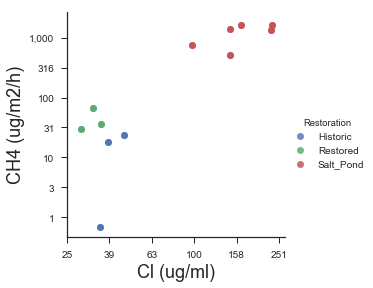

In [251]:
sns.lmplot(x='Salinity',y='CH4_pos',data=Sal_meta,hue='Restoration',fit_reg=False,size=4)
plt.gca().set_yticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_yticks()]) 
plt.gca().set_xticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_xticks()]) 
plt.xlabel("Cl (ug/ml)", fontsize=18)
plt.ylabel("CH4 (ug/m2/h)",fontsize=18)

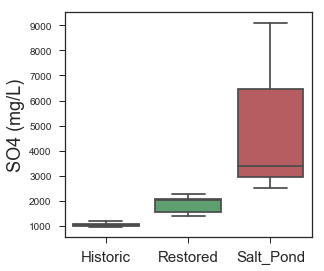

In [252]:
dfSO4 = concat_columns(["SO4_S"])
dfSO4["values"] = 10**dfSO4["values"]
plt.figure(figsize=(4.5,4))
sns.boxplot(x="Restoration", y="values",data=dfSO4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.ylabel("SO4 (mg/L)",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("")

array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

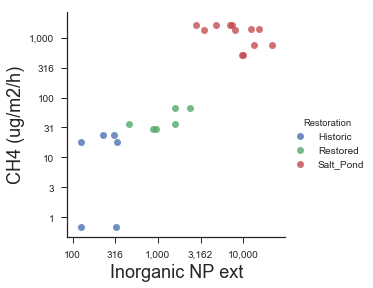

In [253]:
#sns.factorplot(x="Restoration", y="values", hue="type",data=concat_columns(["NP_ext"]), kind="bar")
#g = sns.pairplot(y_vars=["CH4_pos"], x_vars = ["NP_ext","Olsen_P"], hue='Restoration', data=Sal_meta,size=4)

#ax.get_yaxis().set_major_formatter(                                       # not scientific label
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.lmplot(y="CH4_pos", x = "NP_ext", hue='Restoration',fit_reg=False, data=Sal_meta,size=4)
#plt.yticks([-0.5,  0. ,  1. ,  2. ,  3.5])
#plt.xlim([1.5,5])
plt.gca().set_yticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_yticks()]) 
plt.gca().set_xticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_xticks()]) 
plt.xlabel("Inorganic NP ext", fontsize=18)
plt.ylabel("CH4 (ug/m2/h)",fontsize=18)
plt.gca().get_xticks()


## Import Gene abundance table(s)

In [254]:
# Import and clean table

# Not normalized (included gene names)
#Salt_pond_KO= pd.read_csv('Salt_pond_KO_ordered.txt', sep='\t', index_col=0)

# Get gene fxns (TODO, maybe not needed)

# DESeq2 normalized 
Salt_pond_KO_DSq = pd.read_csv('Salt_pond_KO_ordered_DESeq2.txt', sep='\t', index_col=0)


## ABSTRACTION  @@@@@@@@@@  ANNOT. Selector
Gene_abund = Salt_pond_KO_DSq                     ## MG_RAST_KO SELECT
del Gene_abund.index.name   # Drop row index name before transpose
Gene_abundT = Gene_abund.T  # TRANSPOSE, samples as rows for join with ENV# Gene_abundT.head()

# Gene_abundT.head() 
# Gene_list = Gene_abundT.columns  # Get gene list (for later)  -- acting wonky, no methods could be use
# mgRAST_KO_de
(2 ** Gene_abundT)

,K00001,K00002,K00003,K00004,K00005,K00006,K00007,K00008,K00009,K00010,...,K19778,K19781,K19783,K19784,K19785,K19787,K19788,K19789,K19791,K19792
R2A_A_D1,2791.838940,366.787331,1847.040775,385.503460,172.338354,47.304319,31.831870,1527.545883,190.295812,1016.433419,...,11.114722,11.114722,35.280522,388.131039,11.114722,24.253146,31.831870,236.664581,11.114722,11.114722
R2A_A_D2,2594.066952,239.453216,1797.779042,345.442074,129.239208,15.920348,67.340382,1584.706553,133.611465,1013.267938,...,11.234002,11.234002,45.232882,357.524922,39.159760,15.920348,50.759291,260.474801,24.658275,11.234002
R2A_B_D1,2902.338348,232.695580,1797.779042,365.923941,181.270456,48.573583,45.433987,1475.512063,135.486003,1046.241365,...,11.803968,11.803968,57.194321,374.131078,17.006331,17.006331,34.886573,272.535433,26.584253,11.803968
R2A_B_D2,2052.263127,199.010398,1748.618679,426.351641,258.603860,38.945912,38.945912,2072.275356,218.441022,805.421403,...,17.136493,11.872896,35.182839,372.294373,11.872896,11.872896,38.945912,332.267183,35.182839,11.872896
R2A_C_D1,2674.400844,194.509930,2022.606564,407.032448,264.917621,26.741343,101.469336,1645.146105,124.672546,989.050243,...,11.851518,11.851518,48.843680,448.076111,31.066763,11.851518,45.689793,278.667317,42.364972,11.851518
R2A_C_D2,2447.341988,199.037988,1955.063837,444.518607,314.910925,21.282563,44.072291,1983.730052,280.372298,947.446060,...,11.555438,11.555438,25.749991,491.041109,25.749991,11.555438,33.796455,309.758487,58.133586,16.532122
SF2_A_D1,2065.105828,345.825394,1637.183141,479.006028,320.793255,52.531104,63.579951,2270.823718,228.460351,784.919015,...,11.964598,11.964598,22.387166,177.650754,22.387166,22.387166,49.491196,289.415825,11.964598,11.964598
SF2_A_D2,2510.919393,308.751000,1896.337454,558.030436,395.490711,20.879279,51.886956,2813.207006,261.234205,939.728374,...,36.709969,11.405834,25.246299,238.360274,16.248110,16.248110,43.246156,345.154863,11.405834,11.405834
SF2_B_D1,2551.270227,473.165147,2105.577117,649.011396,376.420137,11.872896,45.807121,2815.157649,269.081613,915.934105,...,22.140256,11.872896,35.182839,233.406350,11.872896,11.872896,38.945912,371.263583,17.136493,11.872896
SF2_B_D2,2674.400844,479.304940,2323.364833,684.022514,401.456538,48.901269,31.105548,2866.351853,283.538336,853.945389,...,11.861380,11.861380,38.891959,259.411747,17.113940,17.113940,38.891959,416.652261,26.774728,11.861380


## Import ontology 

# New ontology IMPORT

In [255]:
# Import NPS genes  -- ORIGINAL IMPORT
# NPS_KO = pd.read_csv('CNPS_CH4_KOs_WHH_Aug_2017.txt', sep='\t')
# NPS_KO = NPS_KO.iloc[:,:8]

# Import CNPS, CH4, Ferment genes
CNPSch4_Fm_KO = pd.read_csv('Ontology_KO_CNPSch4_Fm_whh0.txt', sep='\t', index_col=0)
CNPSch4_Fm_KO

### ABSTRACTION ### call gene_ontol
gene_ontol = CNPSch4_Fm_KO

# Check size, unique labels
gene_ontol.shape            # 527
gene_ontol.columns 
len(gene_ontol.mid_name.unique()) 
mid_u = gene_ontol.mid_name.unique() 
len(gene_ontol.mid_name.unique()) # 526, one repeated...not bad

# Make new sort and index vars
x = pd.Series(range(1,len(gene_ontol),1))    # create series 1:n
s =x.astype(str)                             # make string
gene_ontol['KO_order'] = x                   # num for sort
gene_ontol['KO_order_S'] = s               # num string for print                       # gene_ontol.shape
gene_ontol.head()
#gene_ontol.columns

########################
## ADD Abbrev. NAMES
Ont = gene_ontol         # Rename Ont shorter
gene_ontol['sm_name'] = (Ont['KO']+ " " + Ont['L3'] + " " + Ont['gene'].str[:4])
gene_ontol['mid_name'] = (Ont['KO']+ " " + Ont['L3'] + " ( " + Ont['gene'].str[:4] + " ) " + Ont['fxn'].str[:18])
gene_ontol.tail()

,L1,L2,L3,L4,KO,gene,fxn,EC,sm_name,mid_name,KO_order,KO_order_S
185,Fermentation,Acetate,Acetogen,NaN,K00925,ackA,acetate_kinase,[EC:2.7.2.1],K00925 Acetogen ackA,K00925 Acetogen ( ackA ) acetate_kinase,186,186
186,Fermentation,Acetate,Acetogen,NaN,K04020,eutD,phosphotransacetylase,NaN,K04020 Acetogen eutD,K04020 Acetogen ( eutD ) phosphotransacetyl,187,187
187,Fermentation,Acetate,Acetogen,NaN,K00640,cysE,serine O-acetyltransferase,[EC:2.3.1.30],K00640 Acetogen cysE,K00640 Acetogen ( cysE ) serine O-acetyltra,188,188
188,Fermentation,Acetate,Acetogen,NaN,K13598,ntrY,"two-component system, NtrC family, nitrogen re...",[EC:2.7.13.3],K13598 Acetogen ntrY,K13598 Acetogen ( ntrY ) two-component syst,189,189
189,Fermentation,Acetate,Acetogen,NaN,K01905,E6.2.1.13,acetyl-CoA synthetase (ADP-forming),[EC:6.2.1.13],K01905 Acetogen E6.2,K01905 Acetogen ( E6.2 ) acetyl-CoA synthet,190,190


In [256]:
### Import Gene colors
gene_colors = pd.read_csv('Ontol_KO_L2_Color_KEY_whh0.txt', sep='\t', index_col=0)         
# gene_colors = gene_colors.iloc[:,4:6]                                  # why not keep it all and drop later?        # get L3 colors and cats    # gene_colors

#### Merge colors, Ontol
gene_ontol_colors = pd.merge(gene_ontol, gene_colors, on = 'L2', how='inner')  # Here changed to L2
# gene_colors.head()
# gene_ontol_colors
gene_colors

,L2,color
0,Sugars,#e94c3e
1,Polymers,#b8302a
2,Aromatic,#5f3230
3,Denitrification,#93ce81
4,NO3_reduction,#6bb96d
5,NH3_oxidation,#41a359
6,NO3_A.reduction,#36854d
7,NH4_assimilation,#356542
8,N2_fixation,#344338
9,P_transport,#4e96c8


## Subset Ontology

In [257]:
### Get gene cycle subsets
gene_ontol_colors.head()
gene_ontol_colors.L1.unique()

Carbon = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Carbon')]             # L1 = Carbon 
Nitrogen = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Nitrogen')]         # L1 = Nitrogen
Phosphorus = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Phosphorus')]     # L1 = Phosphorus
Sulfur = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Sulfur')]             # L1 = Sulfur
CH4_cycling = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('CH4_cycling')]   # L1 = CH4 
Fermentation = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Fermentation')] # L1 = Fermentaiton

NPS_CH4_LIST = [Nitrogen, Phosphorus, Sulfur, CH4_cycling]
# NPS_CH4 = pd.concat([NPS_CH4_LIST], 0) 

NPS_CH4 = pd.concat([Nitrogen, Phosphorus, Sulfur, CH4_cycling], 0) 

# gene_ontol_colors.tail()

# @@@@@@@@@@@@@@@@@@@
# Select Gene ONTOL by cycle 

In [258]:
#   [[[ ON / OFF ]]]            # by commenting out -- NOTE Sequence will matter if [[[ ON ]]]

# gene_ontol_colors = Nitrogen
# gene_ontol_colors = CH4_cycling
gene_ontol_colors = NPS_CH4

gene_ontol_colors.L1.unique()   # gene_ontol_colors.L2.unique()

array(['Nitrogen', 'Phosphorus', 'Sulfur', 'CH4_cycling'], dtype=object)

# @@@@@@@@@@@@@@@@@@
# Set Correlation Cutoff Params

In [259]:
# SET global CORRELATION CUTOFFS: 
# DEF parameters: Out_var, cutoff 

### OUT_VAR - variable to cut off on
# out_var = 'Salinity'  
# out_var = 'Cl' 

out_var = 'CH4_pos'
# out_var = 'CH4_umol_m2_d' 

# out_var = 'CH4_m2_lin' 
# out_var = 'CO2_mg_m2_h'  
# out_var = 'DOC_mg_L'  
# out_var = 'C'  
# out_var = 'N_g_m2'  

###  r_cut - correlation CUTOFF value
r_cut = 0.5        # corr coefficient cutoff (abs. val.) 

## FIG SIZE
figdim = (10,10)           # plot size

out_var


'CH4_pos'

# @@@@@@@@@@@@@@@@@@
# RUN script below

### PROCESS DATA for Heatmap
1): Join [Genes, Env], corr. subset;

2): Merge [Genes, Env] with [Gene Ontology / Colors]

3): Cutoff subset

4): Get data matrix, colors for heatmap

### PLOT heatmap after proc. data

In [260]:
### 1) Make [Genes, Env] Correlation matrix:  merge, corr, subset NR

Gene_abundT = Gene_abund.T                                    # Transpose before join
Genes_env = Env_chem.join(Gene_abundT, how='right')           # JOIN genes and metadata
Genes_env_corr = Genes_env.corr()                             # Make CORR matrix

# Subset Corr matrix by [Genes, Env]                           
n_enVars = len(env_chem_List)                                 # get n Env_vars
Genes_env_CORR = Genes_env_corr.iloc[n_enVars:,:n_enVars]     # reduce Corr.M to include only [Genes, Env] 

### Merge [Genes, Env] corretlation matrix with Gene ontology 
# Prep corr matrix, set KO col, drop index
Genes_env_CORR['KO']= Genes_env_CORR.index                  # M1: Set KO as column, drop index
Genes_env_CORr = Genes_env_CORR.reset_index(drop=True)      # Drop index      
Genes_env_CORr.head() # Genes_env_CORr.shape


,Salinity,Cond_uS_cm,Temp,DO_perc,DO_mg_L,Redox,pH_YSI,CH4_umol_m2_d,CO2_umol_m2_d,CH4_CO2,...,Mg,Zn,Mn,Cu,Fe,CH4_m2_lin,CO2_m2_lin,Salinity_lin,pH_lin,KO
0,-0.074759,-0.070217,-0.080049,-0.112672,0.017819,-0.280717,0.070289,-0.013013,0.007434,0.014791,...,0.125575,0.396682,0.143343,0.444992,0.316210,-0.045501,-0.037747,-0.126783,-0.065867,K00001
1,0.575822,0.568306,0.041587,-0.396216,-0.645770,0.204430,0.278701,0.526049,0.393946,0.437543,...,0.682640,0.738606,0.246013,0.020201,-0.352505,0.553546,0.399363,0.507924,0.517657,K00002
2,-0.156208,-0.151800,-0.157153,-0.164075,0.044040,-0.395241,0.020051,-0.059631,-0.022533,-0.052988,...,0.072453,0.410166,0.129345,0.516188,0.354780,-0.077457,-0.046677,-0.219726,-0.043680,K00003
3,-0.388098,-0.399151,-0.468068,-0.178808,0.127426,-0.208312,-0.374258,-0.415069,-0.364641,-0.335307,...,-0.196199,0.248937,-0.151544,0.540492,0.523103,-0.328322,-0.416521,-0.401769,0.012413,K00004
4,0.024669,0.004996,-0.488337,-0.479029,-0.330930,-0.396233,-0.280833,-0.178794,-0.063907,-0.143379,...,0.231890,0.593648,0.035916,0.356674,0.091906,0.126892,-0.135322,-0.031568,0.372937,K00005


In [261]:
#Genes_env.corr(method='spearman')
Genes_env.T.to_csv("/Users/jzz0026/Google_superjohnlove/jupyter/Saltpond/Wyatt_C-P_CH402/env_gene_deseq.csv")
#CNPSch4_Fm_KO

In [262]:
#Genes_env_CORr

In [263]:
# MERGE on KO, while keeping duplicates, drop NA
Genes_env_ontol_Corr= pd.merge(gene_ontol_colors, Genes_env_CORr, on = 'KO', how='left')    #  Merge
#Genes_env_ontol_Corr = Genes_env_ontol_Corr.dropna(how='all', subset= env_chem_List)        # Drop NA in Env by index
# Genes_env_ontol_Corr.iloc[:,:20]
#Genes_env_ontol_Corr.dropna(how='all', subset= env_chem_List)
del env_chem_List[11]


In [264]:
### 2) Merge [Genes, Env] with [Gene Ontology/colors]

# MERGE on KO, while keeping duplicates, drop NA
Genes_env_ontol_Corr= pd.merge(gene_ontol_colors, Genes_env_CORr, on = 'KO', how='left')    #  Merge
#Genes_env_ontol_Corr = Genes_env_ontol_Corr.dropna(how='all', subset= env_chem_List)        # Drop NA in Env by index
# Genes_env_ontol_Corr.iloc[:,:20]

# RE-INDEX matrix by GENE NAMES -- must be unique, here MID_NAME
Genes_env_ontol_CorN = Genes_env_ontol_Corr.reset_index(drop=True)    # Drop index           
Genes_env_ontol_CorN = Genes_env_ontol_Corr.set_index('mid_name',0)   # RENAME index: Needs UNIQUE index, hence L3 
del Genes_env_ontol_CorN.index.name                                   # delete index name     


In [265]:
### 3) get CUTOFF data
# Make Absolute Value var
out_var = 'CH4_pos'
abs_var = "abs_"+ out_var     
abs_var

# append Abs. Value to matrix
Genes_env_ontol_CorN[abs_var] = abs(Genes_env_ontol_CorN[out_var])  
Genes_env_ontol_CorN.head()  # Genes_env_ontol_Corr.shape

# Cutoff at data |r| > cut                                                              
# Print string with abs_var, exec -- abstraction workaround
Cut_CALL = 'Genes_env_ontol_Corr_cut = Genes_env_ontol_CorN[Genes_env_ontol_CorN.'+ abs_var +' > r_cut]'
Cut_CALL
exec(Cut_CALL)    # Genes_env_ontol_Corr_cut

In [266]:
### 4) Get data ONLY Matrix
### Make data only matrix for heatmap
n_ontol = len(gene_ontol_colors.columns)                            # get length of onotlogy map - to subtract 
Genes_env_ontol_CorrM = Genes_env_ontol_Corr_cut.iloc[:,n_ontol:]   # Drop onlology variables 
#Genes_env_ontol_CorrM = Genes_env_ontol_CorrM.iloc[:,1:]            # Drop new KO column, was index in ontology
Genes_env_ontol_CorrM = Genes_env_ontol_CorrM.iloc[:,:-1]           # Drop column w abs. val

gene_colors = Genes_env_ontol_Corr_cut['color']                     # Gets gene colors --- Changed from L3 in initial
Genes_env_ontol_CorrM["CH4_pos"].sort_values(ascending=False)

K14082 CH4_methylam ( mtbA ) [methyl-Co(III) me    0.780684
K00399 CH4_Archa ( mcrA ) methyl-coenzyme M        0.771610
K00581 CH4_Archa ( mtrE ) tetrahydromethanop       0.747123
K01514 P_PolyPase ( PRUN ) exopolyphosphatase      0.736746
K00401 CH4_Archa ( mcrB ) methyl-coenzyme M        0.722357
K00580 CH4_Archa ( mtrD ) tetrahydromethanop       0.716704
K00402 CH4_Archa ( mcrG ) methyl-coenzyme M        0.701323
K00579 CH4_Archa ( mtrC ) tetrahydromethanop       0.700069
K06162 P_CH3_Phn ( phnM ) alpha-D-ribose 1-m       0.653259
K00578 CH4_Archa ( mtrB ) tetrahydromethanop       0.634780
K00583 CH4_Archa ( mtrG ) tetrahydromethanop       0.608544
K16177 CH4_methylam ( mtmC ) monomethylamine co    0.597347
K00582 CH4_Archa ( mtrF ) tetrahydromethanop       0.594440
K00205 CH4_H2.red ( fwdF ) 4Fe-4S ferredoxin       0.584208
K06164 P_CH3_Phn ( phnI ) alpha-D-ribose 1-m       0.582196
K06166 P_CH3_Phn ( phnG ) alpha-D-ribose 1-m       0.568198
K06165 P_CH3_Phn ( phnH ) alpha-D-ribose

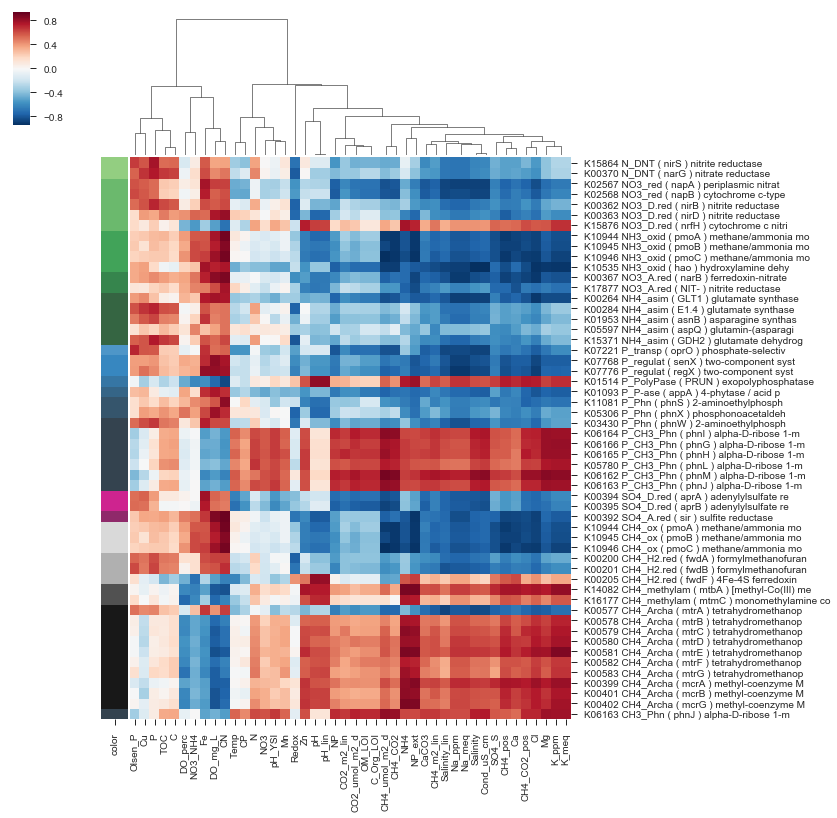

In [267]:
### 5) PLOT heatmap

# PLOTTING Params
# plt.rcParams["figure.figsize"] = (8, 4)
# figdim = (10,10)     # wonky?
# fig.set_size_inches(11.7, 8.27)

cm=sns.clustermap(Genes_env_ontol_CorrM, vmax=0.8, row_cluster=False, col_cluster=True, 
             square=False, row_colors=gene_colors, figsize = (10,13));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()                  
# plt.sca(cm.ax_heatmap) # More on this in a minute
# plt.yticks(rotation=0)

# GET BEST CORRs

In [268]:
# Genes_env_ontol_Corr_cut.head()                      # Starting point from corr matrix
out_varS = ['KO', out_var, abs_var]                    # List vars to get          
corr_out_varS = Genes_env_ontol_Corr_cut[out_varS]     # get vars from CORR MTX

## Sort by abs
# corr_out_varSabs = corr_out_varS.sort_values(by=out_var, ascending =0)    # make abs col
# corr_out_varSabs

## Sort by corr +/-
corr_out_varSout_PLUS= corr_out_varS.sort_values(by=out_var, ascending =0)    # make abs col

# Get 5 most pos/most neg
Max_corr5 = corr_out_varSout_PLUS.head(5)  # 5 largest
Min_corr5 = corr_out_varSout_PLUS.tail(5)  # 5 smallest 

# Combine Top 10
top10 = [Max_corr5, Min_corr5]             # Make list
Top10_data = pd.concat(top10)              # Concat list
# Top10_data

##### Get TOP 10 GENES                     # May not need, redo at end?
# Top10_genes = Top10_data.index
# Top10_genes
# corr_out_varSout_PLUS

# PLOT TOP 10 VARS

###  Modified to accomodate short names for plots

In [269]:
# Prepare plots
# Site_or = ('Sandmound','WestPond','Mayberry','Browns','RushRanch','Joice','Goodyear','WhiteSlough','Tolay','ChinaCamp','Muzzi')

## Get environment Metadata                                         # Sal_meta.columns # metacols = ['Sample','Location']
metacols = ['New_index', 'Sample_name', 'Sample', 'Site', 'Core', 'Depth',
       'Restoration', 'Hydrol']

Metadata = Sal_meta[metacols]                                       # Note SAL_META here, not env, was dropped 
Metadata.set_index('Sample', inplace=True)                          # added back samp indexes 
del Metadata.index.name                                             # drop index name    

#### Rename GENEs in Gene_abund         Gene_abund.head()
Gene_abundN = Gene_abund.copy()                                     # Makes copy 
Gene_abundN['KO'] = Gene_abundN.index                               # Get KO from index
Gene_abundN = Gene_abundN.reset_index(drop=True)                    # Drop index

# Merge with TOP 10 by KO
# Gene_abundN.head() 

In [270]:
# get SMALL names for scatterplots                           #gene_ontol_colors.head()
names = ['sm_name', 'mid_name']                               # get name translation list 
rename = gene_ontol_colors[names]                             # get sm_name, mid_name DF 
sm_name = rename.set_index('mid_name')                        # del sm_name.index.name # sm_name

# Get Top 10 KOs, with Corr.
getvars = ['KO',out_var]
# Top_10_KOs = pd.DataFrame(Top10_data[getvars])                                 # DEFUNCT  # Get top 10 KOs, index
Top_10_KOs = Top10_data[getvars]

# Top_10_KOs_renamer
Top_10_KOs_rename = Top_10_KOs.join(sm_name)                  # Join with Top 10 KOs
Top_10_KOs_sm_name = Top_10_KOs_rename.set_index('sm_name')   # Reset index 
del Top_10_KOs_sm_name.index.name                             # Del index name   
Top_10_KOs_smN = Top_10_KOs_sm_name                           # shorten var

In [271]:
# Merge TOP 10 with Gene_abund, by KO
Gene_abund_top10 = pd.merge(Top_10_KOs_smN, Gene_abundN, on='KO', how='left') # Merge with Gene_abund
Gene_abund_top10.index = Top_10_KOs_smN.index                                 # Reindex
Gene_abund_top10 = Gene_abund_top10.iloc[:,2:]                                # Drop KOs, corr

# Transpose and Rejoin with Environ data (including meta)
Gene_abund_top10T = Gene_abund_top10.T 

## Join Meta with samples / genes                                             # with prior [Genes x Env matrix]  # Genes_env.head()
Env_gene_abund_Top10 = Genes_env.join(Gene_abund_top10T, how='right')         # JOIN Top genes with soil chem.
Meta_Env_gene_abund_Top10 = Metadata.join(Env_gene_abund_Top10, how = 'left') # Join metadata  

# Top 10 variable scatterplots

In [272]:
# Prepare plots
# Top 10 needs sorting after several merges
Top_10_KOs_smN.columns = ['KO','Corr']                                    # Rename abstract var
Top_10_KOs_smN = Top_10_KOs_smN.sort_values('Corr',0, ascending=False)    # Sort by corr

# Get just list of genes for plots
Top10_genes = Top_10_KOs_smN.index

# Color params:
# sns.set_style("white")
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

Top10_genes
Top_10_KOs_smN
Top_10_KOs

,KO,CH4_pos
K14082 CH4_methylam ( mtbA ) [methyl-Co(III) me,K14082,0.780684
K00399 CH4_Archa ( mcrA ) methyl-coenzyme M,K00399,0.771610
K00581 CH4_Archa ( mtrE ) tetrahydromethanop,K00581,0.747123
K01514 P_PolyPase ( PRUN ) exopolyphosphatase,K01514,0.736746
K00401 CH4_Archa ( mcrB ) methyl-coenzyme M,K00401,0.722357
K10945 CH4_ox ( pmoB ) methane/ammonia mo,K10945,-0.877186
K10944 NH3_oxid ( pmoA ) methane/ammonia mo,K10944,-0.897643
K10944 CH4_ox ( pmoA ) methane/ammonia mo,K10944,-0.897643
K10946 NH3_oxid ( pmoC ) methane/ammonia mo,K10946,-0.903666
K10946 CH4_ox ( pmoC ) methane/ammonia mo,K10946,-0.903666


###  by LOCATION

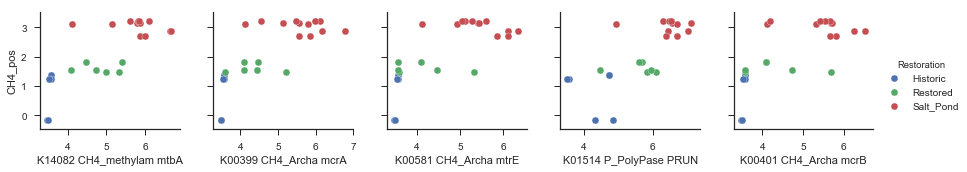

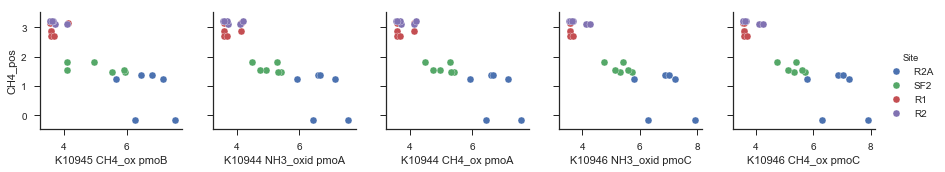

In [273]:
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[0:5], hue='Restoration', data=Meta_Env_gene_abund_Top10)
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[5:11], hue='Site', data=Meta_Env_gene_abund_Top10)
# Top10_genes

### By DEPTH

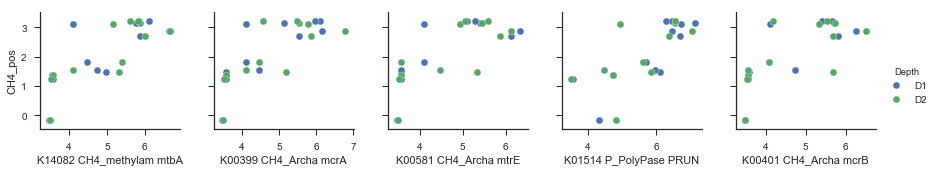

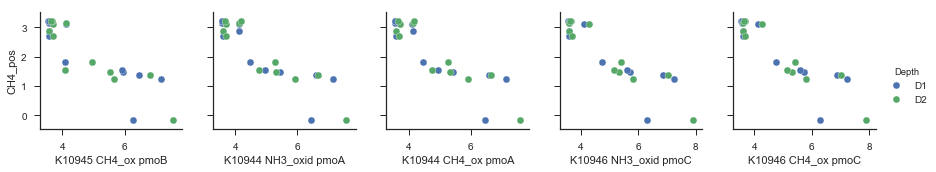

In [274]:
# Prepare plots
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[0:5], hue='Depth', data=Meta_Env_gene_abund_Top10)
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[5:11], hue='Depth', data=Meta_Env_gene_abund_Top10)

In [275]:
Sal_meta.columns

Index([u'New_index', u'Sample_name', u'Sample', u'Site', u'Core', u'Depth',
       u'Restoration', u'Hydrol', u'Date', u'Lat', u'Long', u'Salinity',
       u'Cond_uS_cm', u'Temp', u'DO_perc', u'DO_mg_L', u'Redox', u'pH_YSI',
       u'CH4_umol_m2_d', u'CO2_umol_m2_d', u'CH4_CO2', u'CH4_pos',
       u'CH4_CO2_pos', u'pH', u'Cl', u'SO4_S', u'TOC', u'OM_LOI', u'C_Org_LOI',
       u'CaCO3', u'C', u'N', u'P', u'CN', u'CP', u'NP', u'NO3', u'NH4',
       u'Olsen_P', u'NP_ext', u'NO3_NH4', u'K_ppm', u'K_meq', u'Na_ppm',
       u'Na_meq', u'Ca', u'Mg', u'Zn', u'Mn', u'Cu', u'Fe', u'CH4_m2_lin',
       u'CO2_m2_lin', u'Salinity_lin', u'pH_lin', u'NP_ext_lin', u'NP_lin',
       u'Cl_lin'],
      dtype='object')

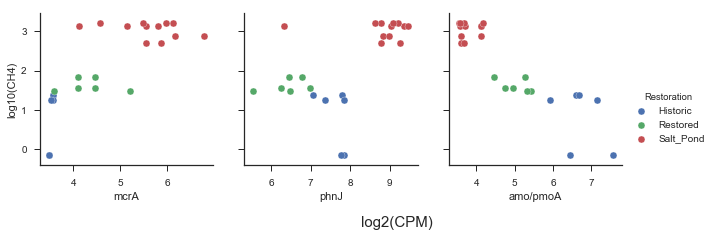

In [287]:
Sal_meta_Gene_abund = pd.merge(Sal_meta,Gene_abundT,left_on="Sample",right_index=True,how="left")
#Genes_env["K06163"]
fig = sns.pairplot(x_vars=["K00399","K06163","K10944"],y_vars='CH4_pos',data=Sal_meta_Gene_abund,hue='Restoration',size=3)
fig.axes[0][0].set_xlabel("mcrA")
fig.axes[0][1].set_xlabel("phnJ")
fig.axes[0][2].set_xlabel("amo/pmoA")
fig.axes[0][0].set_ylabel("log10(CH4)")
plt.text(1, -2, "log2(CPM)",size=15)

#sns.boxplot(x=Sal_meta_Gene_abund["Restoration"], y=K00399)
#sns.lmplot(x="K06163",y='K_ppm',data=Sal_meta_Gene_abund,hue='Restoration',fit_reg=False,size=3)


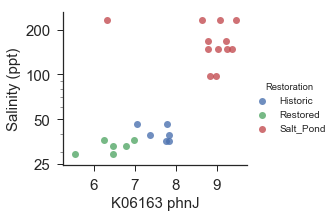

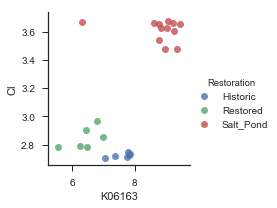

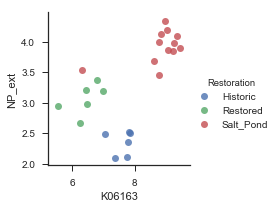

In [277]:
ax1 = sns.lmplot(x="K06163",y='Salinity_lin',data=Sal_meta_Gene_abund,hue='Restoration',fit_reg=False,size=3,aspect=1.2)
ax1.set(yscale='log')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel("Salinity (ppt)",size=15)
plt.xlabel("K06163 phnJ",size=15)
ax1.ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))               # integer format 
plt.yticks([25,50,100,200]) 

ax2 = sns.lmplot(x="K06163",y='Cl',data=Sal_meta_Gene_abund,hue='Restoration',fit_reg=False,size=3)
ax2 = sns.lmplot(x="K06163",y='NP_ext',data=Sal_meta_Gene_abund,hue='Restoration',fit_reg=False,size=3)

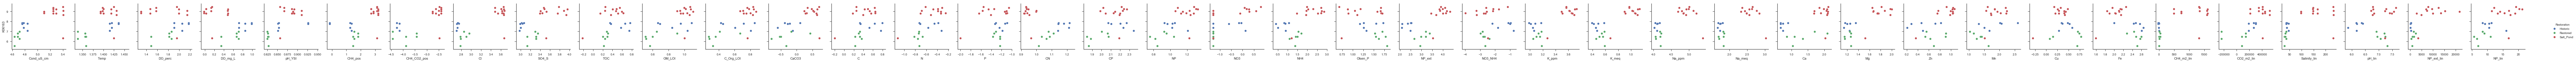

In [278]:
chem_col = Sal_meta_Gene_abund.columns[12:57]
chem_col = Sal_meta_Gene_abund[chem_col].loc[:,~Sal_meta_Gene_abund[chem_col].isnull().any()].columns
chem_col = list(chem_col[:7]) + list(chem_col[8:])
#sns.pairplot(x_vars=['K06163'],y_vars=[chem_col],data=Sal_meta_Gene_abund,hue='Restoration',size=3)
Sal_meta_Gene_abund[Sal_meta_Gene_abund.columns[12:57]]
sns.pairplot(x_vars=chem_col,y_vars='K06163',data=Sal_meta_Gene_abund,hue='Restoration',size=3)


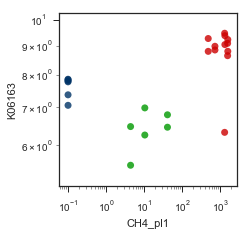

In [279]:
## color
red = ("#CC0000","#CC0000","#CC0000","#CC0000","#CC0000","#CC0000")     # R1
#orange = ('#FF6600', '#FF6600','#FF6600','#FF6600','#FF6600','#FF6600') # R2 
blue = ('#009900', '#009900','#009900','#009900','#009900','#009900')   # SF2
green = ("#003366", "#003366", "#003366", "#003366", "#003366", "#003366")    # R2A
site_colors = green + blue +  red *2

list(Sal_meta_Gene_abund.columns)
Sal_meta_Gene_abund.loc[:,"CH4_m2_lin"]
Sal_meta_Gene_abund["CH4_pl1"] = Sal_meta_Gene_abund["CH4_m2_lin"]
Sal_meta_Gene_abund.loc[Sal_meta_Gene_abund["CH4_pl1"] < 0,"CH4_pl1"] = 0.1

## set type
sns.set_style("white")
sns.set_style("ticks")

#sns.boxplot(x="K06163", y="CH4_pl1", data=Sal_meta_Gene_abund)
plt.figure(figsize=(7,7))
plt.subplot(221)
ax1=plt.subplot(2, 2, 1)

ax1.set(xscale='log', yscale='log')
sns.regplot(y='K06163', x='CH4_pl1', fit_reg=False, marker='o', data = Sal_meta_Gene_abund, 
           scatter_kws={'facecolors':site_colors, 'alpha':0.8},ax=ax1)

In [280]:
Sal_meta_Gene_abund["Sample"]

0     R2A_A_D1
1     R2A_A_D2
2     R2A_B_D1
3     R2A_B_D2
4     R2A_C_D1
5     R2A_C_D2
6     SF2_A_D1
7     SF2_A_D2
8     SF2_B_D1
9     SF2_B_D2
10    SF2_C_D1
11    SF2_C_D2
12     R1_A_D1
13     R1_A_D2
14     R1_B_D1
15     R1_B_D2
16     R1_C_D1
17     R1_C_D2
18     R2_A_D1
19     R2_A_D2
20     R2_B_D1
21     R2_B_D2
22     R2_C_D1
23     R2_C_D2
Name: Sample, dtype: object

## Gene abudance instead of correlation

In [281]:
Genes_env_ontol_CorrM_col = [a.split(" ")[0] for a in Genes_env_ontol_CorrM.index]
Gene_abund_high_corr = Gene_abund.loc[Genes_env_ontol_CorrM_col]
Gene_abund_high_corr["KO_fun"] = Genes_env_ontol_CorrM.index
Gene_abund_high_corr_rename = Gene_abund_high_corr.set_index("KO_fun")

blue = ["#003366"]
green = ["#009900"]
red = ["#CC0000"]
Restoration_color = blue*6 + green*6 + red * 12

#Gene_abund_high_corr_rename.columns
Restoration_color = pd.DataFrame(Restoration_color,Gene_abund_high_corr_rename.columns)
Restoration_color.columns = ["Restoration"]

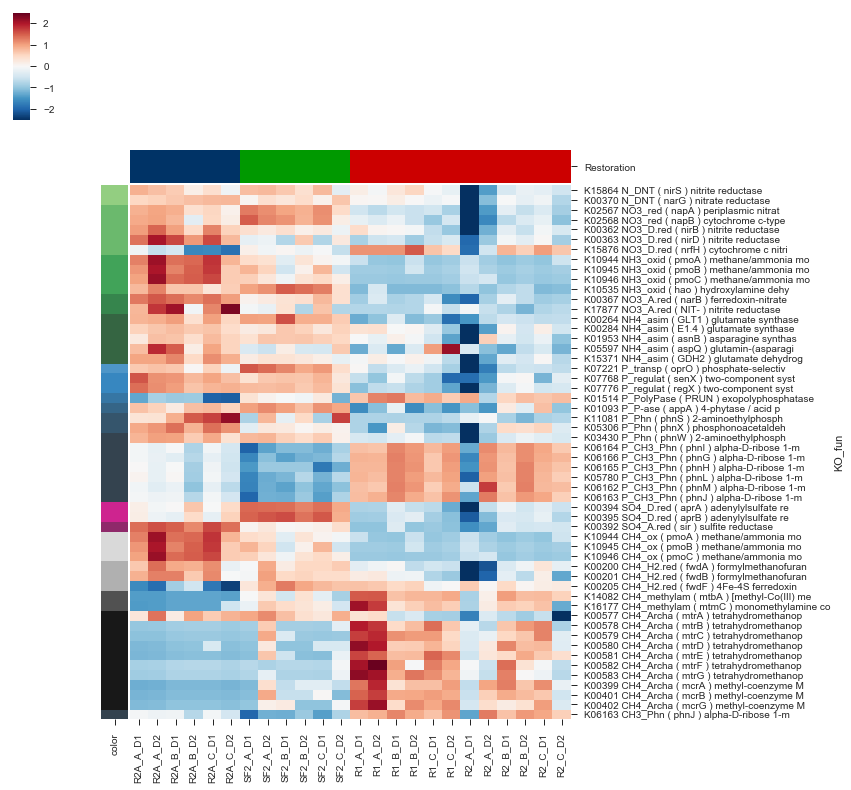

In [282]:
cm=sns.clustermap(Gene_abund_high_corr_rename, row_cluster=False, col_cluster=False, 
             square=False, vmin=-2.5, vmax=2.5, row_colors=gene_colors,col_colors=Restoration_color,z_score=0, figsize = (10,13));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()  

In [283]:
Genes_env_ontol_CorrM.loc[:,["Salinity","CH4_pos"]]
len(Genes_env_ontol_CorrM[Genes_env_ontol_CorrM['CH4_pos'] < 0])

33

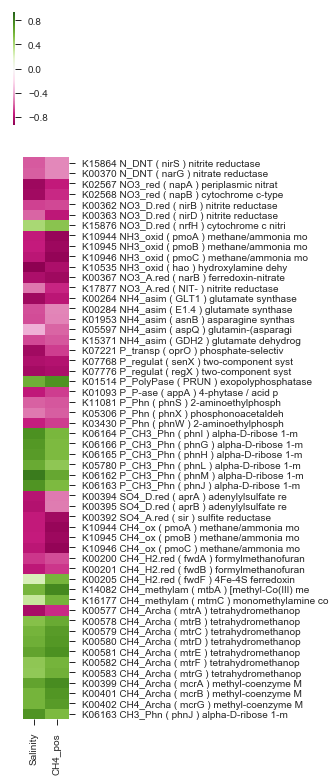

In [284]:
#Gene_abund_high_corr_rename.index
Genes_env_ontol_CorrM.loc[:,["Salinity","CH4_pos"]]
cm2 = sns.clustermap(Genes_env_ontol_CorrM.loc[:,["Salinity","CH4_pos"]], row_cluster=False, col_cluster=False,
                     cmap="PiYG",square=False,figsize = (1,13)); 
plt.setp(cm2.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks

plt.show()  


In [285]:
Genes_env_ontol_CorrM.loc[:,'CH4_pos']

K15864 N_DNT ( nirS ) nitrite reductase           -0.507925
K00370 N_DNT ( narG ) nitrate reductase           -0.509563
K02567 NO3_red ( napA ) periplasmic nitrat        -0.751993
K02568 NO3_red ( napB ) cytochrome c-type         -0.719783
K00362 NO3_D.red ( nirB ) nitrite reductase       -0.655328
K00363 NO3_D.red ( nirD ) nitrite reductase       -0.768371
K15876 NO3_D.red ( nrfH ) cytochrome c nitri       0.523176
K10944 NH3_oxid ( pmoA ) methane/ammonia mo       -0.897643
K10945 NH3_oxid ( pmoB ) methane/ammonia mo       -0.877186
K10946 NH3_oxid ( pmoC ) methane/ammonia mo       -0.903666
K10535 NH3_oxid ( hao ) hydroxylamine dehy        -0.828711
K00367 NO3_A.red ( narB ) ferredoxin-nitrate      -0.873240
K17877 NO3_A.red ( NIT- ) nitrite reductase       -0.727739
K00264 NH4_asim ( GLT1 ) glutamate synthase       -0.779008
K00284 NH4_asim ( E1.4 ) glutamate synthase       -0.512340
K01953 NH4_asim ( asnB ) asparagine synthas       -0.518782
K05597 NH4_asim ( aspQ ) glutamin-(aspar